# Simple `chain` example w/ 4 integers

Use local Dask version:

In [1]:
from sys import path
path = ['.'] + path 

In [2]:
from dask import delayed
from dask.utils import chain

Create some delayed integers that also `print` when they are computed:

In [3]:
def _id(x):
    print(f'computing: {x}')
    return x

def n(value, name): return delayed(_id)(value, dask_key_name=name)

n1 = n(4, 'n1')
n2 = n(5, 'n2')
n3 = n(6, 'n3')
n4 = n(7, 'n4')

Create a "chain" out of them: a `Delayed` list of their values is returned, but the computation graph visits them each in serial:

In [4]:
seq = chain([n1, n2, n3, n4]); seq

Delayed('combine_n4')

Inspect the dependency graph (which is a linked-list):

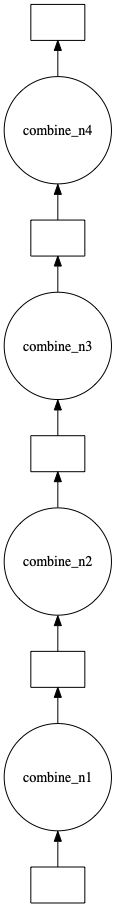

In [5]:
seq.visualize()

Verify the output:

In [6]:
seq.compute()

computing: 4
computing: 5
computing: 6
computing: 7


[4, 5, 6, 7]